In [28]:
import numpy as np
import matplotlib.pyplot as plt
import math
np.random.seed(1000)

In [29]:
A=np.random.randn(1000,10)

In [30]:
epsilon=np.random.randn(1000,1)

In [31]:
x_bar=[]
for i in range(10):
  if i%2==0:
    x_bar.append([np.random.uniform(-i-2,-i-1)])
  else:
    x_bar.append([np.random.uniform(i+1,i+2)])
x_bar = np.array(x_bar)

In [32]:
y= np.add(np.matmul(A,x_bar),epsilon)

#Que1.

By adding the Regularizer term, the given loss function's hessian changes to $A^TA+λI/2$ , which is a positive semidefinite matrix from linear algebra , hence the possibility of non inversiblity of the hessian matrix reduces. And we are able to minimize the function by using Newton's method without getting the singularity error. 

In [33]:
#Now we will define a function which will compute and return the function value 
def evalf(x, n, l ):  
  #Input: x is a numpy array of size n 
  assert type(x) is np.ndarray  #do not allow arbitrary type arguments 
  assert len(x) == n #do not allow arbitrary size arguments 
  #after checking if the argument is valid, we can compute the objective function value
  #compute the function value and return it 
  fval = np.linalg.norm(np.matmul(A,x) - y)
  fval = l/2*np.matmul(x.T,x) + 0.5 * (fval)**2
  return (fval)

In [34]:
def evalg(x, n, l):
  assert type(x) is np.ndarray
  assert len(x) == n
  grad = l*x + np.matmul(A.T, np.matmul(A, x) - y)
  return grad

In [35]:
def evalh(x,n,l):
  assert type(x) is np.ndarray  #do not allow arbitrary type arguments 
  assert len(x) == n #do not allow arbitrary size arguments 
  return np.matmul(A.T,A) + l*np.identity(n)

In [36]:
#line search type 
BACKTRACKING_LINE_SEARCH = 1

In [37]:
def compute_D_k(x,n):
  assert type(x) is np.ndarray
  assert len(x) == n
  hess = evalh(x,n)
  return np.linalg.inv(hess)

In [38]:
def compute_steplength_backtracking_scaled_direction(x,n,l, gradf, direction, alpha_start, rho, gamma): #add appropriate arguments to the function 
  assert type(x) is np.ndarray and len(x) == n
  assert type(gradf) is np.ndarray and len(gradf) == n
  #assert type(direction) is np.ndarray and len(direction) == 2  
   
  #assert type(alpha_start) is float and alpha_start>=0. 
  assert type(rho) is float and rho>=0.
  assert type(gamma) is float and gamma>=0. 
  
  
  #Complete the code 
  alpha = alpha_start
  gradf = evalg(x,n,l)
  p=direction
  #np.matmul(np.matrix.transpose(gradf), p)
  while evalf(x+alpha*p,n,l) > evalf(x,n,l) + gamma*alpha*np.matmul(np.matrix.transpose(gradf), p) :
    alpha = rho*alpha
  
  return alpha

In [39]:
import math
def find_minimizer_Newtonmethod(start_x, n,l, tol, line_search_type, *args):
  #Input: start_x is a numpy array of size n, tol denotes the tolerance and is a positive float value
  assert type(start_x) is np.ndarray #do not allow arbitrary type arguments 
  assert len(start_x) == n #do not allow arbitrary size arguments 
  assert type(tol) is float and tol>=0 
  
  x = start_x
  g_x = evalg(x,n,l)
  h_x = evalh(x,n,l)

  if line_search_type == BACKTRACKING_LINE_SEARCH:
      alpha_start = float(args[0])
      rho = float(args[1])
      gamma = float(args[2])
  k = 0
  x_newton =  []
  f_newton = []
  while (np.linalg.norm(g_x) > tol): #continue as long as the norm of gradient is not close to zero upto a tolerance tol
    #implement the Newton's method here
    D_k=np.linalg.inv(evalh(x,n,l))
    direction = np.matmul(D_k,-g_x)
    if line_search_type == BACKTRACKING_LINE_SEARCH:
      step_length = compute_steplength_backtracking_scaled_direction(x,n,l,g_x, direction, alpha_start, rho, gamma)  
    else:  
      raise ValueError('Line search type unknown. Please check!')
    x_newton.append(x)
    f_newton.append(evalf(x,n,l))
    x = np.subtract(x, np.multiply(step_length,np.matmul(D_k, g_x)))
    k += 1 #increment iteration
    g_x = evalg(x, n,l) #compute gradient at new point
    
  return x, evalf(x,n,l), k,x_newton,f_newton

In [40]:

def find_minimizer_BFGS_method(start_x, n,l, tol, line_search_type, *args):
  #Input: start_x is a numpy array of size n, tol denotes the tolerance and is a positive float value
  assert type(start_x) is np.ndarray #do not allow arbitrary type arguments 
  assert len(start_x) == n #do not allow arbitrary size arguments 
  assert type(tol) is float and tol>=0 
  
  x = start_x
  x0 = x
  g_x = evalg(x,n,l)
  g0 = g_x

  
  if line_search_type == BACKTRACKING_LINE_SEARCH:
      alpha_start = float(args[0])
      rho = float(args[1])
      gamma = float(args[2])
  k = 0
  
  #print('iter:',k,  ' f(x):', evalf(x,n), ' gradient norm:', np.linalg.norm(g_x))
  x_bfgs = []
  f_bfgs = []
  while (np.linalg.norm(g_x) > tol): #continue as long as the norm of gradient is not close to zero upto a tolerance tol
    #implement the Newton's method here
    
    x0 = x
    g_x = evalg(x,n,l)
    g0 = g_x

    if k==0:
      B_k=np.identity(n)/4
    else:

      I = np.identity(n)
      
      mu_k = 1/np.matmul(np.transpose(y_k),s_k)

      B_k = np.add(np.matmul(np.matmul(np.subtract(I, mu_k*np.outer( s_k, np.transpose(y_k))),B_k), np.subtract(I, mu_k*np.outer(y_k,np.transpose(s_k)))), mu_k*np.outer( s_k, np.transpose(s_k)))
    direction = np.matmul(B_k,-g_x)
    if line_search_type == BACKTRACKING_LINE_SEARCH:
      step_length = compute_steplength_backtracking_scaled_direction(x,n,l,g_x, direction, alpha_start, rho, gamma)     
    else:  
      raise ValueError('Line search type unknown. Please check!')
    x_bfgs.append(x0)
    f_bfgs.append(evalf(x0,n,l))
    x = np.subtract(x, np.multiply(step_length,np.matmul(B_k, g_x)))
    g_x = evalg(x, n,l)
    s_k = x-x0 
    y_k=  g_x-g0
    k += 1 #increment iteration
    #g_x = evalg(x, n) #compute gradient at new point
   
  return x, evalf(x,n,l), k,x_bfgs,f_bfgs

#Que4.

for lamda =  0.001
	x_star= [[-1.52615618]
 [ 2.3593343 ]
 [-3.71408397]
 [ 4.65508056]
 [-5.7922779 ]
 [ 6.05589718]
 [-7.25518231]
 [ 8.32368594]
 [-9.87347598]
 [10.71877202]]
	Iterations= 5
	Minimum function values:  [[504.820307]]
for lamda =  0.01
	x_star= [[-1.52614455]
 [ 2.35932028]
 [-3.71405267]
 [ 4.65503097]
 [-5.79223521]
 [ 6.05584892]
 [-7.25512314]
 [ 8.32362251]
 [-9.87339781]
 [10.71868531]]
	Iterations= 5
	Minimum function values:  [[506.83576522]]
for lamda =  0.1
	x_star= [[-1.52602828]
 [ 2.35918007]
 [-3.71373963]
 [ 4.65453516]
 [-5.79180829]
 [ 6.05536638]
 [-7.25453148]
 [ 8.3229883 ]
 [-9.87261621]
 [10.71781829]]
	Iterations= 5
	Minimum function values:  [[526.98856754]]
for lamda =  1.0
	x_star= [[-1.52486663]
 [ 2.35777873]
 [-3.71061221]
 [ 4.64958266]
 [-5.78754243]
 [ 6.05054512]
 [-7.24862026]
 [ 8.31665145]
 [-9.86480705]
 [10.70915597]]
	Iterations= 5
	Minimum function values:  [[728.33876802]]


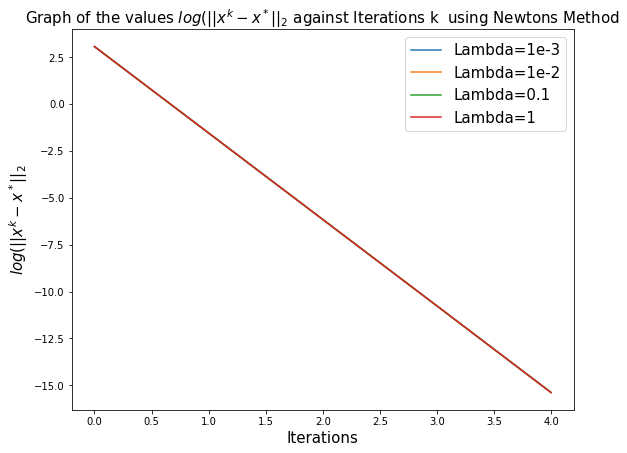

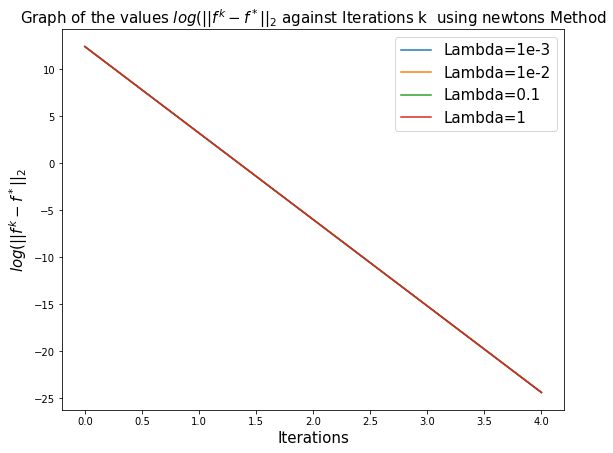

In [41]:
from timeit import default_timer as timer
L=[1e-3,1e-2,0.1,1.0]
n = 10
alpha = 0.99
rho = 0.5
gamma = 0.5
my_tol= 1e-5
my_start_x =np.zeros((10,1))
Time_taken_Newton = []
x_star = []
plt.figure(figsize=(9,7))
for l in L:
  start_time = timer()
  x, opt_fval, num_iters, x_newton,f_newton = find_minimizer_Newtonmethod(my_start_x, n,l, my_tol, BACKTRACKING_LINE_SEARCH, alpha, rho, gamma)
  end_time = timer()
  Time_taken_Newton.append(end_time - start_time)
  x_star.append(x)
  print('for lamda = ',l)
  print("\tx_star=", x)
  print('\tIterations=',num_iters)
  print('\tMinimum function values: ',opt_fval)

  plt.plot([i for i in np.arange(len(x_newton))], [math.log(np.linalg.norm(x_newton[k]-x)) for k in range(len(x_newton))],label=r'$ $')
plt.title(r'Graph of the values $log(||x^k - x^*||_2$ against Iterations k  using Newtons Method',fontsize=15)
plt.xlabel(r'Iterations',fontsize=15)
plt.ylabel(r'$log(||x^k - x^*||_2$',fontsize=15)
plt.legend(["Lambda=1e-3", "Lambda=1e-2","Lambda=0.1","Lambda=1"],fontsize=15, loc ="upper right")
plt.show()

plt.figure(figsize=(9,7))
for l in L:
  x, opt_fval, num_iters, x_newton,f_newton = find_minimizer_Newtonmethod(my_start_x, n,l, my_tol, BACKTRACKING_LINE_SEARCH, alpha, rho, gamma)
  plt.plot([i for i in np.arange(len(x_newton))],[math.log(abs(evalf(x_newton[k],n,l)-opt_fval)) for k in range(len(x_newton))], label=r'$ $')
plt.title(r'Graph of the values $log(||f^k - f^*||_2$ against Iterations k  using newtons Method',fontsize=15)
plt.xlabel(r'Iterations',fontsize=15)
plt.ylabel(r'$log(||f^k - f^*||_2$',fontsize=15)
plt.legend(["Lambda=1e-3", "Lambda=1e-2","Lambda=0.1","Lambda=1"],fontsize=15, loc ="upper right")
plt.show()

Convergence rates of the iterates seems same for all values of lambda from the plots. But we can see that functions attains a better minimum at lamda = 0.001 . So, the convergence rates are increasing with decreasing value of lamda.
The convergence tyoe for all the values of lamda is Q linear.

#Que5.

x_star= [[-1.52615618]
 [ 2.3593343 ]
 [-3.71408397]
 [ 4.65508056]
 [-5.7922779 ]
 [ 6.05589718]
 [-7.25518231]
 [ 8.32368594]
 [-9.87347598]
 [10.71877202]] 
x_bar= [[-1.5598061 ]
 [ 2.33046007]
 [-3.6795264 ]
 [ 4.69010633]
 [-5.7915437 ]
 [ 6.06683061]
 [-7.25068834]
 [ 8.29645038]
 [-9.91953898]
 [10.75357414]]
Iterations 18
	Minimum function values:  [[504.820307]]
x_star= [[-1.52614455]
 [ 2.35932028]
 [-3.71405267]
 [ 4.65503097]
 [-5.79223521]
 [ 6.05584892]
 [-7.25512314]
 [ 8.32362251]
 [-9.87339781]
 [10.71868531]] 
x_bar= [[-1.5598061 ]
 [ 2.33046007]
 [-3.6795264 ]
 [ 4.69010633]
 [-5.7915437 ]
 [ 6.06683061]
 [-7.25068834]
 [ 8.29645038]
 [-9.91953898]
 [10.75357414]]
Iterations 18
	Minimum function values:  [[506.83576522]]
x_star= [[-1.52602828]
 [ 2.35918007]
 [-3.71373963]
 [ 4.65453516]
 [-5.79180829]
 [ 6.05536638]
 [-7.25453148]
 [ 8.3229883 ]
 [-9.87261621]
 [10.71781829]] 
x_bar= [[-1.5598061 ]
 [ 2.33046007]
 [-3.6795264 ]
 [ 4.69010633]
 [-5.7915437 ]
 [ 6.066

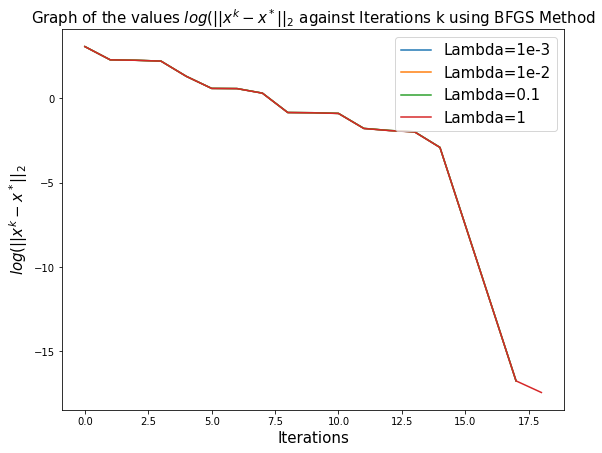

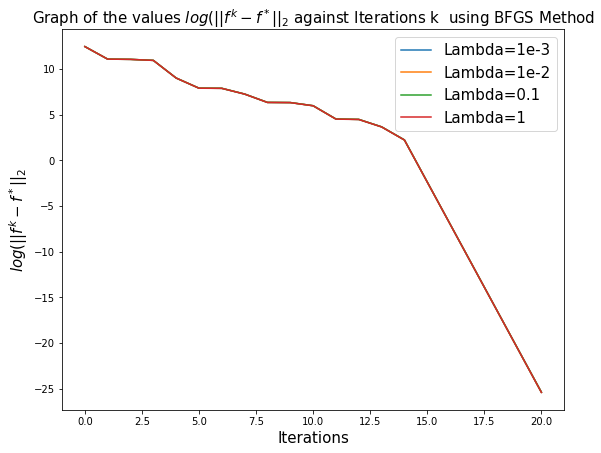

In [42]:
Time_taken_bfgs = []
x_star = []
plt.figure(figsize=(9,7))
for l in L:
  start_time = timer()
  x, opt_fval, num_iters, x_bfgs, f_bfgs= find_minimizer_BFGS_method(my_start_x,n,l,my_tol,BACKTRACKING_LINE_SEARCH,0.99, 0.5,0.5)
  end_time = timer()
  Time_taken_bfgs.append(end_time - start_time)
  x_star.append(x)
  print("x_star=", x, "\nx_bar=", x_bar)
  print('Iterations',num_iters)
  print('\tMinimum function values: ',opt_fval)
  plt.plot([i for i in np.arange(len(x_bfgs))], [math.log(np.linalg.norm(x_bfgs[k]-x)) for k in range(len(x_bfgs))],label=r'$ $')

plt.title(r'Graph of the values $log(||x^k - x^*||_2$ against Iterations k using BFGS Method',fontsize=15)
plt.xlabel(r'Iterations',fontsize=15)
plt.ylabel(r'$log(||x^k - x^*||_2$',fontsize=15)
plt.legend(["Lambda=1e-3", "Lambda=1e-2","Lambda=0.1","Lambda=1"],fontsize=15, loc ="upper right")
plt.show()

plt.figure(figsize=(9,7))
for l in L:
  x, opt_fval, num_iters, x_bfgs, f_bfgs= find_minimizer_BFGS_method(my_start_x,n,l,my_tol,BACKTRACKING_LINE_SEARCH,0.9, 0.5,0.5)
  plt.plot([i for i in np.arange(len(x_bfgs)-1)],[math.log(abs(evalf(x_bfgs[k],n,l)-opt_fval)) for k in range(len(x_bfgs)-1)], label=r'$ $')
plt.title(r'Graph of the values $log(||f^k - f^*||_2$ against Iterations k  using BFGS Method',fontsize=15)
plt.xlabel(r'Iterations',fontsize=15)
plt.ylabel(r'$log(||f^k - f^*||_2$',fontsize=15)
plt.legend(["Lambda=1e-3", "Lambda=1e-2","Lambda=0.1","Lambda=1"],fontsize=15, loc ="upper right")
plt.show()

Since the difference absolute difference of $x^k$ and x* is decreasing in each case. So, this satisfies the Q linear convergence property. However it converges rapidly in some iterations and gradually in some iterations.

#Que6.

In [43]:
import pandas as pd
print('x bar =',x_bar)
print()
data = {'Lambda':  L,'Time taken in Newton method':Time_taken_Newton, 'Time taken in BFGS method':Time_taken_bfgs}
df = pd.DataFrame (data, columns = ['Lambda','Time taken in Newton method','Time taken in BFGS method'])
print (df)

x bar = [[-1.5598061 ]
 [ 2.33046007]
 [-3.6795264 ]
 [ 4.69010633]
 [-5.7915437 ]
 [ 6.06683061]
 [-7.25068834]
 [ 8.29645038]
 [-9.91953898]
 [10.75357414]]

   Lambda  Time taken in Newton method  Time taken in BFGS method
0   0.001                     0.002750                   0.030171
1   0.010                     0.002085                   0.017007
2   0.100                     0.004824                   0.014861
3   1.000                     0.001993                   0.016274


**By this table we see that in the Newton method the computation times(required to find the final optimal solution x* obtained for different values of lambda) is  less then the bfgs method. which is clear from the number of iterations as well. However we get almost same minimum function value.**